In [4]:
import pandas as pd
from scripts import tt
from scripts import kb
import numpy as np
import warnings
warnings.filterwarnings("ignore")
#kb_ = kb.get_kb_accuracy()
#kb__ = kb.get_kb_impact_accuracy()
tt.training_testing_accuracy()

acustic: 0.11049322984112693
acustic: 0.0626914498468211
acustic: 0.029640308953255777
acustic: 0.07066821111009444
acustic: 0.12062513918088696
acustic: 0.38131268689229864
acustic: 0.17446028634110777
cancer: 0.17899549541210646
cancer: 0.0390264523150281
cancer: 0.012036090121574628
cancer: 0.03399267591769412
cancer: 0.22062906638661922
cancer: 0.24315750819702378
cancer: 0.19496327236700836
ecoli: 0.12723616338288815
ecoli: 0.05277397456329235
ecoli: 0.05366459244050121
ecoli: 0.05730914637597136
ecoli: 0.14718068686840932
ecoli: 0.313962382392079
ecoli: 0.14307288076195432
frogs: 0.14261838353062192
frogs: 0.04363783349668011
frogs: 0.015665052472480658
frogs: 0.051817358346165264
frogs: 0.14024954071002443
frogs: 0.3105308041154519
frogs: 0.18072657746571155
letter: 0.12456036842615999
letter: 0.06320746225285215
letter: 0.024544215027177026
letter: 0.06514370330095957
letter: 0.12691347757163954
letter: 0.2733450912894556
letter: 0.08041773860275483
oil: 0.15861738041304585
oil

In [6]:
import matplotlib.pyplot as plt

def bar_plot(title, labels, training_means):

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    bar = ax.bar(x, training_means, width, label='Testing')
    y_pos = range(len(labels))
    plt.xticks(y_pos, labels, rotation=90)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('RMSE')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

    fig.tight_layout()
    #plt.savefig(your_path + title + "-all.pdf", bbox_inches='tight')
    #plt.ylim(0,55)
    #plt.savefig(your_path + title + "-ylim.pdf", bbox_inches='tight')

    plt.show()

In [7]:
data = pd.read_csv("../results/prediction_accuracy.csv")
data


,dataset,technique,rmse
0,acustic,IQR,0.110493
1,acustic,ISO,0.062691
2,acustic,PERC,0.029640
3,acustic,STD,0.070668
4,acustic,ZSB,0.120625
5,acustic,KNN,0.381313
6,acustic,LOF,0.174460
7,cancer,IQR,0.178995
8,cancer,ISO,0.039026
9,cancer,PERC,0.012036


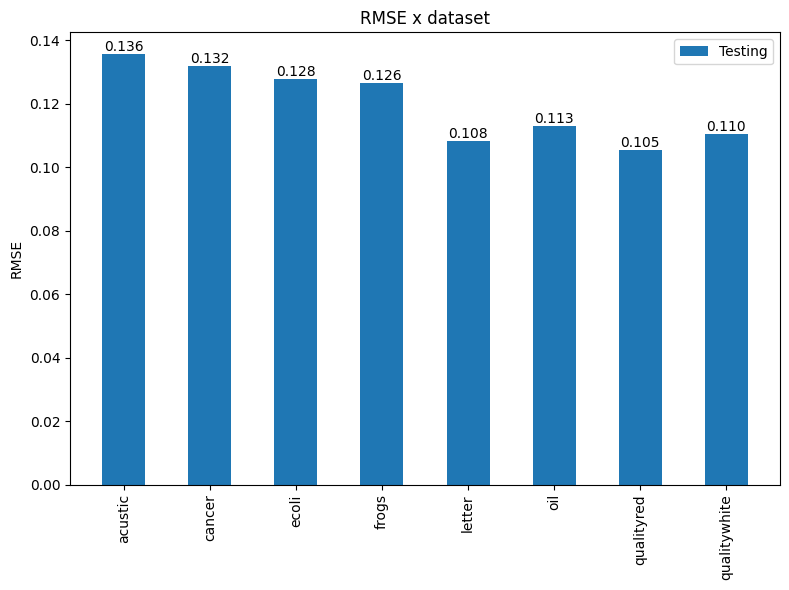

In [8]:
### performance per dataset
df = data[['dataset','rmse']].groupby(['dataset']).mean().reset_index().copy()
bar_plot("RMSE x dataset",df.dataset.unique(),df.rmse)

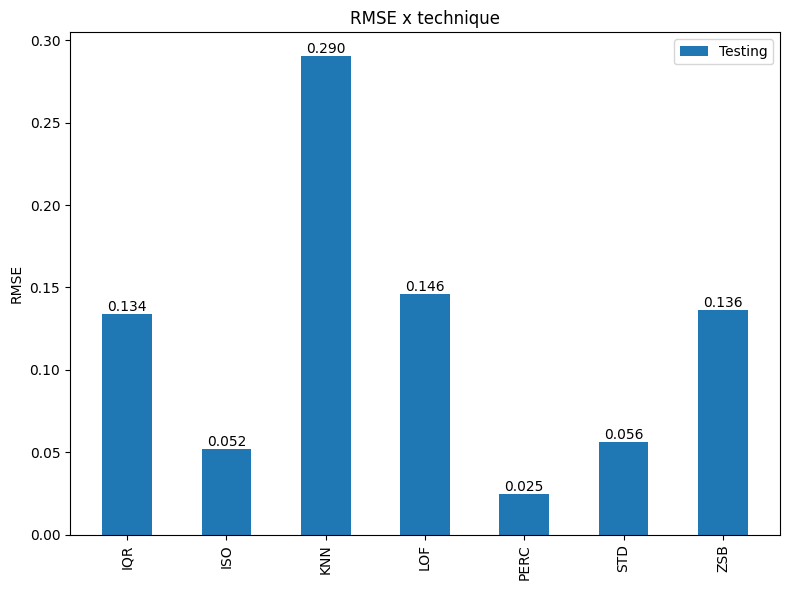

In [11]:
### performance per tecnica
df = data[['technique','rmse']].groupby(['technique']).mean().reset_index().copy()
bar_plot("RMSE x technique",df.technique.unique(),df.rmse)

In [12]:
len(data[data.rmse < 0.10])/len(data)


0.48214285714285715

In [13]:
len(data[data.rmse < 0.15])/len(data)


0.7142857142857143

In [14]:
len(data[data.rmse < 0.20])/len(data)


0.8392857142857143

In [15]:
len(data[data.rmse < 0.30])/len(data)


0.9464285714285714

In [16]:
data.rmse.mean()


np.float64(0.11989104473891417)